In [15]:
##### General Descriptive Analysis of available meta-data on samples + received data for samples (overview over all data except single-cell RNA)
## Cytokines
## Neutrophils
## Proteomics

#############################################
# Prerequisites - Load Libraries

In [16]:
source('MS0_Libraries.r')

###############################################
# Preqrequisites Configurations & Parameters

In [17]:
data_path = '../data/current'

In [18]:
result_path = '../results/current'

In [19]:
data_path

[1] "../data/current"

In [20]:
libraries = c('L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10','L11', 'L12', 'L13', 'L14')

# Load Data 

## Sample Meta Data

### Overview all samples

In [21]:
### Read in data

In [22]:
path = paste0(data_path, "/preprocessed-data/meta-data/all_samples.csv")
all_samples =  read.csv(path)
print(file.info(path)$mtime)

[1] "2022-01-14 09:24:58 CET"


In [23]:
nrow(all_samples)

[1] 146

In [24]:
length(unique(all_samples$id))

[1] 146

In [25]:
all_samples$id = as.character(all_samples$id)

In [26]:
unique(all_samples$id)

[1] "1"    "10"   "11"   "12"   "13"   "14"   "15"   "16"   "17"   "18"  
 [11] "19"   "2"    "20"   "21"   "22"   "23"   "24"   "25"   "26"   "27"  
 [21] "28"   "29"   "3"    "30"   "31"   "32"   "33"   "34"   "4"    "5"   
 [31] "6"    "7"    "8"    "9"    "1.1"  "1.2"  "1.3"  "1.4"  "10.1" "10.2"
 [41] "10.3" "10.4" "11.1" "11.2" "11.3" "11.4" "12.1" "12.2" "12.3" "12.4"
 [51] "13.1" "13.2" "13.3" "13.4" "14.1" "14.2" "14.3" "14.4" "15.1" "15.2"
 [61] "15.3" "15.4" "16.1" "16.2" "16.3" "16.4" "17.1" "17.2" "17.3" "17.4"
 [71] "18.1" "18.2" "18.3" "18.4" "19.1" "19.2" "19.3" "19.4" "2.1"  "2.2" 
 [81] "2.3"  "2.4"  "20.1" "20.2" "20.3" "20.4" "21.1" "21.2" "21.3" "21.4"
 [91] "22.1" "22.2" "22.3" "22.4" "23.1" "23.2" "23.3" "23.4" "24.1" "24.2"
[101] "24.3" "24.4" "25.1" "25.2" "25.3" "25.4" "26.1" "26.2" "26.3" "26.4"
[111] "27.1" "27.2" "27.3" "27.4" "28.1" "28.2" "28.3" "28.4" "3.1"  "3.2" 
[121] "3.3"  "3.4"  "4.1"  "4.2"  "4.3"  "4.4"  "5.1"  "5.2"  "5.3"  "5.4" 
[131] "6.1"  "6.2"  "6.3"  "6.4"  "7.1"  "7.2"  "7.3"  "7.4"  "8.1"  "8.2" 
[141] "8.3"  "8.4"  "9.1"  "9.2"  "9.3"  "9.4"

In [27]:
all_samples$sample_id = paste0(tolower(str_extract(all_samples$sample, 'M|K')), all_samples$id)

In [28]:
head(all_samples)

,sample,measurement,id,sample_id
,<chr>,<chr>,<chr>,<chr>
1,K1,TP0,1,k1
2,K10,TP0,10,k10
3,K11,TP0,11,k11
4,K12,TP0,12,k12
5,K13,TP0,13,k13
6,K14,TP0,14,k14


In [29]:
all_samples$sample = str_replace(all_samples$sample, ' ', '') # remove empty spaces in names

### Hashtag Mapping (sc-RNA -Seq Data)

In [30]:
### Read in data

In [31]:
path = paste0(data_path, "/preprocessed-data/meta-data/Mapping_Hashtag_Sample.csv")
hashtags = read.csv(path)
print(file.info(path)$mtime)

[1] "2021-09-02 13:17:03 CEST"


In [32]:
hashtags = hashtags %>% rename(measurement_tp = group)

In [33]:
nrow(hashtags)

[1] 135

In [34]:
nrow(hashtags[hashtags$in_sample == 1, ])  # Overall 121 measured samples for which single-cell RNA seq data was measured

[1] 121

In [35]:
head(hashtags,2) # actually this data is not needed as measurement information is also given in other classification tables is the same 

,library,id,name,read,pattern,sequence,feature_type,X,in_sample,display_name,measurement_tp
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>
1,L1,HTO_B0251,1.1,R2,5PNNNNNNNNNN(BC),GTCAACTCTTTAGCG,Antibody Capture,NA,1,1.1,TP1
2,L1,HTO_B0252,2.1,R2,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture,NA,1,2.1,TP1


In [36]:
table(hashtags$measurement_tp)


Chronic-CCS      No-CCS         TP1         TP2         TP3         TP4 
         16          18          25          30          26          20 

In [37]:
### Add information to all_samples

In [38]:
hashtags$sc_rna_seq_data = 1

In [39]:
all_samples_info = merge(all_samples, unique(hashtags[hashtags$in_sample == 1,c('display_name', 'sc_rna_seq_data')]), by.x = 'id', by.y = 'display_name', all.x = TRUE)

In [40]:
head(all_samples_info)

,id,sample,measurement,sample_id,sc_rna_seq_data
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,K1,TP0,k1,NA
2,1.1,M1,TP1,m1.1,1
3,1.2,M1,TP2,m1.2,NA
4,1.3,M1,TP3,m1.3,NA
5,1.4,M1,TP4,m1.4,NA
6,10,K10,TP0,k10,1


In [41]:
nrow(all_samples_info)

[1] 146

In [42]:
all_samples_info$sc_rna_seq_data[is.na(all_samples_info$sc_rna_seq_data)] = 0

In [43]:
sum(all_samples_info$sc_rna_seq_data)   # 119 samples + tp combinations for which information available

[1] 119

In [44]:
### Prepare one big sample data file

In [45]:
sample_data = merge(all_samples, hashtags, by.x = 'id', by.y = 'display_name', all.x = TRUE)

In [46]:
nrow(sample_data)   # more because some samples measured twice

[1] 149

In [48]:
sample_data$sc_rna_seq_data[is.na(sample_data$sc_rna_seq_data)] = 0

In [49]:
sum(sample_data$sc_rna_seq_data)

[1] 125

In [50]:
investigate = sample_data %>% group_by(sample_id) %>% count() 

In [51]:
investigate[investigate$n > 1, ] # 3 samples that have been measured twice!

sample_id,n
<chr>,<int>
m13.2,2
m6.1,2
m6.4,2


In [52]:
sample_data[sample_data$sample_id == 'm6.1',]

,id,sample,measurement,sample_id,library,id.y,name,read,pattern,sequence,feature_type,X,in_sample,measurement_tp,sc_rna_seq_data
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<dbl>
129,6.1,M6,TP1,m6.1,L3,HTO_B0259,6.1,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,NA,1,TP1,1
130,6.1,M6,TP1,m6.1,L1,HTO_B0256,6.1,R2,5PNNNNNNNNNN(BC),GGTTGCCAGATGTCA,Antibody Capture,NA,0,TP1,1


### Group Classification Mapping

In [53]:
### Read in data

In [54]:
path = paste0(data_path, "/preprocessed-data/meta-data/Mapping_Sample_Groups.csv")
group_classification = read.csv(path, colClasses=c("sample"="character"))
print(file.info(path)$mtime)

[1] "2022-01-14 09:35:27 CET"


In [55]:
nrow(group_classification)

[1] 122

In [56]:
group_classification$library = paste0('L', str_replace(group_classification$library.hashtag, '\\..*', ''))

In [58]:
nrow(unique(group_classification[,c('age', 'sex', 'm', 'classification', 'group')]))   # this information is on sample basis - not dependent of timepoint!

[1] 62

In [59]:
classification_data = unique(group_classification[,c('age', 'sex', 'm', 'classification', 'group')])

In [61]:
### Check out available information

In [62]:
table(group_classification$sex)


  f   m 
 21 101 

In [63]:
table(group_classification$classification)


             acs_subacute           acs_w_infection         acs_w_o_infection 
                        9                        15                        64 
                      ccs           koronarsklerose vollstaendiger_ausschluss 
                       16                         7                        11 

In [64]:
table(group_classification$group)


   acs    ccs no_ccs 
    88     16     18 

In [65]:
table(group_classification$measurement)


TP0 TP1 TP2 TP3 TP4 
 34  22  25  23  18 

In [66]:
### Add information to all_samples_info_file

In [67]:
classification_data$meta_data = 1

In [68]:
nrow(all_samples_info)

[1] 146

In [69]:
all_samples_info = merge(all_samples_info, classification_data, by.x = 'sample', by.y = 'm', all.x = TRUE)

In [71]:
all_samples_info$meta_data[is.na(all_samples_info$meta_data)] = 0

In [72]:
sum(all_samples_info$meta_data)  # Meta-data about assignment available for all samples

[1] 146

In [73]:
nrow(all_samples_info) # classification_data can be merged for all samples

[1] 146

In [74]:
### Combine in one big sample data file

In [75]:
nrow(sample_data)

[1] 149

In [77]:
sample_data = merge(sample_data, classification_data, by.x = c('sample'), by.y = c('m'),  all.x = TRUE)

In [78]:
nrow(sample_data)

[1] 149

### Classification based on EF

In [80]:
### Read in data

In [81]:
path = paste0(data_path, "/preprocessed-data/meta-data/Mapping_Sample_EF.csv")
ef_classification = read.csv(path, colClasses=c("sample"="character"))
print(file.info(path)$mtime)

[1] "2021-10-01 11:15:19 CEST"


In [83]:
unique(ef_classification$delta_ef_value_group)

[1] "x_greater_1" "x_smaller_1" "x_smaller_0" NA

In [84]:
### Adjust format

In [85]:
ef_classification$delta_ef_value_class[ef_classification$delta_ef_value_group == 'x_greater_1'] = 'good'
ef_classification$delta_ef_value_class[ef_classification$delta_ef_value_group == 'x_smaller_1'] = 'intermediate'
ef_classification$delta_ef_value_class[ef_classification$delta_ef_value_group == 'x_smaller_0'] = 'bad'

In [86]:
table(ef_classification$measurement)


TP1 TP2 TP3 TP4 
 24  25  24  25 

In [87]:
nrow(ef_classification)

[1] 98

In [88]:
table(ef_classification$delta_ef_value_class)


         bad         good intermediate 
          29           28           29 

In [89]:
ef_classification$sample = str_replace(ef_classification$m, ' \\(.*', '')

In [90]:
ef_classification_data = unique(ef_classification[,c('sample', 'delta_ef_value_group', 'delta_ef_value', 'delta_ef_value_class')])

In [91]:
ef_classification_data = ef_classification_data[!is.na(ef_classification_data$delta_ef_value), ] # remove NA values

In [92]:
nrow(ef_classification_data)

[1] 21

In [93]:
length(unique(ef_classification_data$sample))  # data is not dependent on measurement tp; for 21 samples ef value available

[1] 21

In [94]:
ef_classification_data$ef_classification_data = 1

In [95]:
ef_classification_data$sample = str_replace(ef_classification_data$sample, ' ', '')

In [96]:
ef_classification_data$sample[!ef_classification_data$sample %in% unique(all_samples_info$sample)] #check whether it can be matched on all samples

character(0)

In [97]:
### Add information to all_samples_info_file

In [98]:
nrow(all_samples_info)

[1] 146

In [99]:
all_samples_info = merge(all_samples_info, ef_classification_data[,c('sample', 'ef_classification_data')], by.x = 'sample', by.y = 'sample', all.x = TRUE)

In [100]:
all_samples_info = merge(all_samples_info, ef_classification_data[,c('sample', 'delta_ef_value_class')], by.x = 'sample', by.y = 'sample', all.x = TRUE)

In [102]:
all_samples_info$ef_classification_data[is.na(all_samples_info$ef_classification_data)] = 0

In [103]:
sum(all_samples_info$ef_classification_data)  # Meta-data about ef value available for 84 tp + sample combinations

[1] 84

In [104]:
nrow(all_samples_info) # classification_data can be merged for all samples

[1] 146

In [105]:
### Combine in one big sample data file

In [106]:
nrow(sample_data)

[1] 149

In [108]:
sample_data = merge(sample_data, ef_classification_data, by.x = 'sample', by.y = 'sample', all.x = TRUE)

In [109]:
nrow(sample_data)

[1] 149

In [111]:
sample_data$ef_classification_data[is.na(sample_data$ef_classification_data)] = 0

In [112]:
sum(sample_data$ef_classification_data) # 87 instead of 84 because of double measurements

[1] 87

### Clinical Data

In [113]:
### Read in data

In [114]:
path = paste0(data_path, "/preprocessed-data/clinical_data/Clinical_Data_Prepared.csv")
clinical = read.csv(path)
print(file.info(path)$mtime)

[1] "2022-01-27 15:54:45 CET"


In [115]:
path = paste0(data_path, "/preprocessed-data/clinical_data/Clinical_Data_Prepared_CRP.csv")
clinical_crp = read.csv(path)
print(file.info(path)$mtime)

[1] "2022-03-25 09:53:53 CET"


In [120]:
length(unique(clinical$sample_id))  # 146 samples

[1] 146

In [121]:
## Investigate newly added CRP data

In [122]:
clinical_crp = unique(clinical_crp)

In [123]:
nrow(clinical_crp)

[1] 146

In [124]:
length(unique(clinical_crp$sample_id))  # matches one entry per sample_id !

[1] 146

In [125]:
clinical = merge(clinical, clinical_crp)

In [126]:
nrow(clinical)   # all samples kept after merging

[1] 146

In [128]:
clinical$clinical_data = 1

In [129]:
clinical$complete_clinical_data = 1
clinical$complete_clinical_data[(is.na(as.numeric(clinical$CRP))) | (is.na(as.numeric(clinical$CK))) |(is.na(as.numeric(clinical$CK_MB))) |(is.na(as.numeric(clinical$Troponin))) ] = 0

Warning message in clinical$complete_clinical_data[(is.na(as.numeric(clinical$CRP))) | :
“NAs introduced by coercion”
Warning message in clinical$complete_clinical_data[(is.na(as.numeric(clinical$CRP))) | :
“NAs introduced by coercion”


In [130]:
clinical$min_1_clinical_value = 1
clinical$min_1_clinical_value[(is.na(as.numeric(clinical$CRP))) & (is.na(as.numeric(clinical$CK))) &(is.na(as.numeric(clinical$CK_MB))) &(is.na(as.numeric(clinical$Troponin)))] =0 

Warning message in clinical$min_1_clinical_value[(is.na(as.numeric(clinical$CRP))) & :
“NAs introduced by coercion”
Warning message in clinical$min_1_clinical_value[(is.na(as.numeric(clinical$CRP))) & :
“NAs introduced by coercion”


In [131]:
#clinical[clinical$min_1_clinical_value == 1,]

In [132]:
#clinical[(is.na(as.numeric(clinical$CRP))) & (is.na(as.numeric(clinical$CK))) &(is.na(as.numeric(clinical$CK_MB))) &(is.na(as.numeric(clinical$Troponin))), ] 

In [133]:
#head(clinical[clinical$complete_clinical_data == 1,])

In [134]:
### Add information to all_samples_info_file

In [135]:
nrow(all_samples_info)

[1] 146

In [136]:
all_samples_info = merge(all_samples_info, clinical[,c('sample_id', 'clinical_data', 'complete_clinical_data', 'min_1_clinical_value')], by.x = 'sample_id', by.y = 'sample_id')

In [138]:
sum(all_samples_info$clinical_data)  # Meta-data about ef value available for 84 tp + sample combinations

[1] 146

In [139]:
nrow(all_samples_info) # classification_data can be merged for all samples

[1] 146

In [140]:
### Combine in one big sample data file

In [141]:
nrow(sample_data)

[1] 149

In [143]:
sample_data = merge(sample_data,clinical, by.x = 'sample_id', by.y = 'sample_id', all.x = TRUE)

In [144]:
nrow(sample_data)

[1] 149

In [146]:
sum(sample_data$clinical_data) # 87 instead of 84 because of double measurements

[1] 149

## Cytokine Data

In [147]:
path = paste0(data_path, "/preprocessed-data/meta-data/Mapping_Sample_Cytokine.csv")
cytokines = read.csv(path, colClasses=c("sample_id"="character"))
print(file.info(path)$mtime)

[1] "2022-02-16 21:29:37 CET"


In [148]:
head(cytokines,2)

,sample_id,sCD40L,EGF,Eotaxin,FGF2,FLT3L,Fractalkine,GCSF,GMCSF,GROalpha,⋯,LIF,MCP2,MCP4,MIP1.,SCF,SDF1alpha.beta,TARC,TPO,TRAIL,TSLP
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,M1.1,1033.94,4.49,48.09,52.77,14.40,57.66,8.70,OOR <,3.43,⋯,1.97,34.73,91.13,2665.03,5.24,4033.41,59.34,354.84,44.25,4.65
2,M11.1,232.19,16.74,32.19,54.38,52.98,107.78,OOR <,OOR <,8.20,⋯,OOR,24.26,73.06,5105.80,74.24,10498.23,10.47,OOR <,84.87,OOR <


In [149]:
path = paste0(data_path, "/preprocessed-data/meta-data/Mapping_Sample_Cytokine_FI.csv")
cytokines_FI = read.csv(path, colClasses=c("sample_id"="character"))
print(file.info(path)$mtime)

[1] "2022-01-19 10:36:51 CET"


In [150]:
head(cytokines_FI,2)

,sample_id,sCD40L,EGF,Eotaxin,FGF.2,FLT.3L,Fractalkine,G.CSF,GM.CSF,GRO.,⋯,LIF,MCP.2,MCP.4,MIP.1..2,SCF,SDF.1...,TARC,TPO,TRAIL,TSLP
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,M1.1,841,34,1102,38,209,25,81,103,99,⋯,26,29,77,2729,53,314,4263,146,301,104
2,M11.1,167,83,627,39,674,47,57,56,180,⋯,22,20,59,4836,98,1341,565,66,561,34


In [151]:
### Investigate available sample-ids in cytokine data

In [152]:
cytokines = cytokines[cytokines$sample_id != '',]

In [153]:
cytokines$id = tolower(cytokines$sample_id)

In [154]:
cytokines$id[cytokines$id == 'm.20.1'] = 'm20.1'

In [155]:
length(unique(cytokines$id))  # 126 tp + sample combinations for which cytokine dat available; 2 cannot be used see below

[1] 126

In [156]:
nrow(cytokines) 

[1] 126

In [157]:
sum(cytokines$id == 'm.20.1')

[1] 0

In [158]:
### Add information about available cytokine data

In [160]:
cytokines$id[!cytokines$id %in% all_samples_info$sample_id]  ## Question to wich samples do these entries belong; cannot be mapped!

character(0)

In [161]:
cytokines$cytokine_data = 1

In [162]:
all_samples_info = merge(all_samples_info, cytokines[,c('id', 'cytokine_data')], by.x = 'sample_id', by.y = 'id', all.x = TRUE)

In [163]:
nrow(all_samples_info)

[1] 146

In [165]:
all_samples_info$cytokine_data[is.na(all_samples_info$cytokine_data)] = 0

In [166]:
sum(all_samples_info$cytokine_data)  

[1] 126

In [167]:
head(cytokines,2)

,sample_id,sCD40L,EGF,Eotaxin,FGF2,FLT3L,Fractalkine,GCSF,GMCSF,GROalpha,⋯,MCP4,MIP1.,SCF,SDF1alpha.beta,TARC,TPO,TRAIL,TSLP,id,cytokine_data
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,M1.1,1033.94,4.49,48.09,52.77,14.40,57.66,8.70,OOR <,3.43,⋯,91.13,2665.03,5.24,4033.41,59.34,354.84,44.25,4.65,m1.1,1
2,M11.1,232.19,16.74,32.19,54.38,52.98,107.78,OOR <,OOR <,8.20,⋯,73.06,5105.80,74.24,10498.23,10.47,OOR <,84.87,OOR <,m11.1,1


In [168]:
available_data = data.frame(type = 'cytokine_assay', feature_name = colnames(cytokines))

In [169]:
head(available_data)

,type,feature_name
,<chr>,<chr>
1,cytokine_assay,sample_id
2,cytokine_assay,sCD40L
3,cytokine_assay,EGF
4,cytokine_assay,Eotaxin
5,cytokine_assay,FGF2
6,cytokine_assay,FLT3L


In [170]:
available_data = available_data[available_data$feature_name != 'sample_id',]
available_data = available_data[available_data$feature_name != 'id',]
available_data = available_data[available_data$feature_name != 'cytokine_data',]

In [171]:
write.csv(available_data, paste0(result_path, '/Data_Share/Cytokine_Assay_Features.csv'))

## Neutrophil Data

### counts_normed (updated_data)

In [172]:
# Read in data

In [173]:
filenames = list.files(paste0(data_path, "/preprocessed-data/neutrophil/counts_normed/"), pattern="*.tsv", full.names=TRUE)

In [174]:
filenames

[1] "../data/current/preprocessed-data/neutrophil/counts_normed//counts.reads.exon.all.counts.tsv"    
[2] "../data/current/preprocessed-data/neutrophil/counts_normed//counts.reads.inex.all.counts.tsv"    
[3] "../data/current/preprocessed-data/neutrophil/counts_normed//counts.umi.exon.all.counts.tsv"      
[4] "../data/current/preprocessed-data/neutrophil/counts_normed//counts.umi.inex.all.counts.tsv"      
[5] "../data/current/preprocessed-data/neutrophil/counts_normed//normalized.reads.exon.all.counts.tsv"
[6] "../data/current/preprocessed-data/neutrophil/counts_normed//normalized.reads.inex.all.counts.tsv"
[7] "../data/current/preprocessed-data/neutrophil/counts_normed//normalized.umi.exon.all.counts.tsv"  
[8] "../data/current/preprocessed-data/neutrophil/counts_normed//normalized.umi.inex.all.counts.tsv"

In [175]:
neutrophil_data_new = list()

In [176]:
for( i in filenames){
    neutrophil_data_new[[i]] = read.csv(i, sep = "\t")
    print(dim( neutrophil_data_new[[i]]))
    print(file.info(i)$mtime)
    }

[1] 38146   124
[1] "2022-01-24 14:56:53 CET"
[1] 42189   124
[1] "2022-01-24 14:57:08 CET"
[1] 38146   124
[1] "2022-01-24 14:57:21 CET"
[1] 42189   124
[1] "2022-01-24 14:57:34 CET"
[1] 38146   124
[1] "2022-01-24 14:58:07 CET"
[1] 42189   124
[1] "2022-01-24 14:58:51 CET"
[1] 38146   124
[1] "2022-01-24 14:59:26 CET"
[1] 42189   124
[1] "2022-01-24 15:00:12 CET"


In [177]:
# Different dimensionalities! // difference between inex and exon

In [178]:
#dim(unique_neutrophil_data_comp)  # comparison old files

In [179]:
head(neutrophil_data_new[[1]],2)

,Geneid,k4_0_ccs_ccs,m14_3_acs_acs_noinf,m26_2_acs_acs_noinf,m14_4_acs_acs_noinf,m3_3_acs_acs_noinf,k1_0_noccs_noccs_compl,k2_0_ccs_ccs,m24_4_acs_acs_sub,m25_2_acs_acs_noinf,⋯,m20_3_acs_acs_inf,m10_2_acs_acs_inf,m14_1_acs_acs_noinf,m24_1_acs_acs_sub,m13_2_acs_acs_noinf,k7_0_ccs_ccs,m18_3_acs_acs_noinf,k26_0_noccs_noccs_ksk,m4_3_acs_acs_noinf,k9_0_noccs_noccs_compl
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000000003.15,0,0,0,0,16,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,ENSG00000000419.13,13,0,21,0,28,0,1,1,0,⋯,0,31,0,39,0,82,0,7,0,0


In [180]:
for(i in 1:length(neutrophil_data_new)){  # adjust sample id in generated data
    data = neutrophil_data_new[[i]]
    
    data = data[,!colnames(data) %in% c('m7_out2_acs_acs_noinf', 'm7_out1_acs_acs_noinf')] # filter out samples that cannot be assigned according to Viktoria
    
    rownames(data) = data$Geneid
    
    data$Geneid = NULL
    data = data.frame(t(data))
    
    data$sample_id = rownames(data)
    data$sample_id = str_extract(data$sample_id, 'm.*_\\d|k.*_\\d')
    data$sample_id = str_replace(data$sample_id, '_0', '')
    data$sample_id = str_replace(data$sample_id, '_', '\\.')
    
    data = unique(data)
    
    neutrophil_data_new[[i]] = data
    }
    

In [181]:
nrow(neutrophil_data_new[[1]])

[1] 121

In [182]:
length(unique(neutrophil_data_new[[1]]$sample_id))

[1] 121

In [183]:
for(i in 1:length(neutrophil_data_new)){
    print(dim(neutrophil_data_new[[i]]))
    }

[1]   121 38147
[1]   121 42190
[1]   121 38147
[1]   121 42190
[1]   121 38147
[1]   121 42190
[1]   121 38147
[1]   121 42190


In [184]:
sum(colnames(neutrophil_data_new[[1]]) %in% colnames(neutrophil_data_new[[2]]))  # all genes from exon file also in inex file

[1] 38147

In [185]:
head(neutrophil_data_new[[1]],2)

,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,⋯,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288617.1,ENSG00000288621.1,ENSG00000288631.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,sample_id
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
k4_0_ccs_ccs,0,13,0,0,312,0,0,0,23,0,⋯,0,0,0,0,0,0,0,0,0,k4
m14_3_acs_acs_noinf,0,0,32,0,181,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,m14.3


In [186]:
head(neutrophil_data_new[[2]],2)

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,⋯,ENSG00000288618.1,ENSG00000288621.1,ENSG00000288622.1,ENSG00000288630.1,ENSG00000288631.1,ENSG00000288632.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,sample_id
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
k4_0_ccs_ccs,0,0,13,0,71,323,26,0,0,23,⋯,109,32,0,145,0,69,0,0,0,k4
m14_3_acs_acs_noinf,0,0,1,32,123,231,161,0,120,0,⋯,0,5,0,187,0,18,0,0,0,m14.3


In [187]:
### Check for differences of available data

In [188]:
nrow(unique(rbind(neutrophil_data_new[[1]], neutrophil_data_new[[2]][,colnames(neutrophil_data_new[[1]])])))  # not the same!

[1] 242

In [189]:
check_similarity = rbind(neutrophil_data_new[[1]], neutrophil_data_new[[2]][,colnames(neutrophil_data_new[[1]])])

In [190]:
check_similarity2 = rbind(neutrophil_data_new[[3]], neutrophil_data_new[[4]][,colnames(neutrophil_data_new[[1]])])

In [191]:
check_similarity3 = rbind(neutrophil_data_new[[5]], neutrophil_data_new[[6]][,colnames(neutrophil_data_new[[1]])])

In [192]:
check_similarity4 = rbind(neutrophil_data_new[[7]], neutrophil_data_new[[8]][,colnames(neutrophil_data_new[[1]])])

In [193]:
check_similarity[check_similarity$sample_id == 'k4',]

,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,⋯,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288617.1,ENSG00000288621.1,ENSG00000288631.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,sample_id
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
k4_0_ccs_ccs,0,13,0,0,312,0,0,0,23,0,⋯,0,0,0,0,0,0,0,0,0,k4
k4_0_ccs_ccs1,0,13,0,71,323,26,0,0,23,0,⋯,0,0,0,0,32,0,0,0,0,k4


In [194]:
#head(unique_neutrophil_data_comp[unique_neutrophil_data_comp$id == 'k4',])  # counts seem to be the same as in exon file for example

In [195]:
check_similarity2[check_similarity2$sample_id == 'k4',]

,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,⋯,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288617.1,ENSG00000288621.1,ENSG00000288631.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,sample_id
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
k4_0_ccs_ccs,0,1,0,0,14,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,k4
k4_0_ccs_ccs1,0,1,0,2,15,1,0,0,1,0,⋯,0,0,0,0,3,0,0,0,0,k4


In [196]:
check_similarity4[check_similarity4$sample_id == 'k4',]

,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,⋯,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288617.1,ENSG00000288621.1,ENSG00000288631.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,sample_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
k4_0_ccs_ccs,0,0.8252187,0,0.0000000,11.553062,0.000000,0,0,0.8252187,0,⋯,0,0,0,0,0.0000000,0,0,0,0,k4
k4_0_ccs_ccs1,0,0.3301420,0,0.6602839,4.952129,0.330142,0,0,0.3301420,0,⋯,0,0,0,0,0.9904259,0,0,0,0,k4


In [197]:
check_similarity3[check_similarity3$sample_id == 'k4',]

,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,⋯,ENSG00000288611.1,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288617.1,ENSG00000288621.1,ENSG00000288631.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,sample_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
k4_0_ccs_ccs,0,0.3166075,0,0.0000000,7.598581,0.0000000,0,0,0.5601518,0,⋯,0,0,0,0,0.0000000,0,0,0,0,k4
k4_0_ccs_ccs1,0,0.1333368,0,0.7282238,3.312905,0.2666735,0,0,0.2359035,0,⋯,0,0,0,0,0.3282135,0,0,0,0,k4


In [199]:
#names(neutrophil_data_new)

In [200]:
neutrophil_data = neutrophil_data_new[['../data/current/preprocessed-data/neutrophil/counts_normed//counts.umi.exon.all.counts.tsv']] # for now take umi exon normalized

In [201]:
neutrophil_data$neutrophil_data = 1

In [202]:
nrow(neutrophil_data)

[1] 121

In [203]:
### Investigate sample IDs + compare with remaining data

In [205]:
all_samples_info = merge(all_samples_info, neutrophil_data[,c('sample_id', 'neutrophil_data')], by.x = 'sample_id', by.y = 'sample_id', all.x = TRUE)

In [206]:
nrow(all_samples_info)

[1] 146

In [208]:
all_samples_info$neutrophil_data[is.na(all_samples_info$neutrophil_data)] = 0

In [209]:
sum(all_samples_info$neutrophil_data)  

[1] 121

In [210]:
available_data = data.frame(type = 'neutrophil_assay', feature_name = colnames(neutrophil_data))

In [211]:
head(available_data)

,type,feature_name
,<chr>,<chr>
1,neutrophil_assay,ENSG00000000003.15
2,neutrophil_assay,ENSG00000000419.13
3,neutrophil_assay,ENSG00000000457.14
4,neutrophil_assay,ENSG00000000460.17
5,neutrophil_assay,ENSG00000000938.13
6,neutrophil_assay,ENSG00000000971.16


In [212]:
available_data = available_data[available_data$feature_name != 'sample_id',]
available_data = available_data[available_data$feature_name != 'id',]
available_data = available_data[available_data$feature_name != 'neutrophil_data',]

In [213]:
write.csv(available_data, paste0(result_path, '/Data_Share/Neutrophil_Assay_Features.csv'))

## Proteomics

In [214]:
### Read in data

In [215]:
path = paste0(data_path, "/preprocessed-data/proteomics/2021_12_19_Proteomics_data.csv")
proteomics = read.csv(path)
print(file.info(path)$mtime)

[1] "2022-01-12 10:44:30 CET"


In [216]:
head(proteomics,2)

,id,M2.3_P10.2,M2.3_P10.3,M5.1_P1,M22.4_P2,K26_P3,M20.4_P4,M24.3_P5,K11_P6,M7.4_P7,⋯,M22.3_P95,M5.2_P96,K21_P97,M18.3_P98,M24.2_P99,K33_P119,M28.4_P30,M27.3_P64,K13_P66,K8_P93
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SERPINA1_A0A024R6I7,-1.663380,-1.663380,3.744514,-1.586136,4.221648,-1.950103,-3.320649,-1.717969,-1.282662,⋯,-1.402290,4.697260,3.905756,4.935030,-0.7766121,4.875899,-2.435552,5.174327,4.457851,5.405647
2,IGLV4-69_A0A075B6H9,-2.414588,-2.414588,-2.672991,-2.938401,-2.751255,-2.881717,-3.030577,-2.804783,-2.795783,⋯,-2.725067,-2.996521,3.304209,2.273003,-1.9571348,4.143519,2.894246,-2.516570,3.645902,-1.277559


In [217]:
### Adjust data format

In [218]:
rownames(proteomics) = proteomics$id

In [219]:
proteomics = proteomics[, -1]

In [220]:
proteomics = t(proteomics)

In [221]:
head(proteomics,2)

,SERPINA1_A0A024R6I7,IGLV4-69_A0A075B6H9,IGLV8-61_A0A075B6I0,IGLV4-60_A0A075B6I1,IGLV10-54_A0A075B6I4,IGLV7-46_A0A075B6I9,IGLV2-18_A0A075B6J9,IGLV3-16_A0A075B6K0,IGLV3-12_A0A075B6K2,IGLV3-10_A0A075B6K4,⋯,GNPTG_Q9UJJ9,WWC3_Q9ULE0,MINPP1_Q9UNW1,TLN1_Q9Y490,ANGPTL3_Q9Y5C1,LYVE1_Q9Y5Y7,FCGBP_Q9Y6R7,COLEC10_Q9Y6Z7,IGHV3OR16-9_S4R460,APOA2_V9GYM3
M2.3_P10.2,-1.66338,-2.414588,1.467756,-6.164178,-1.858412,-2.588001,2.128858,-0.110549,1.968863,2.523862,⋯,-2.162776,1.002701,4.385272,-2.882139,-6.14436,-4.26206,0.1977374,-1.653755,6.184887,4.235612
M2.3_P10.3,-1.66338,-2.414588,1.467756,-6.164178,-1.858412,-2.588001,2.128858,-0.110549,1.968863,2.523862,⋯,-2.162776,1.002701,4.385272,-2.882139,-6.14436,-4.26206,0.1977374,-1.653755,6.184887,4.235612


In [222]:
proteomics = data.frame(proteomics)

In [223]:
proteomics$sample_id = rownames(proteomics)

In [224]:
proteomics$sample_id = tolower(str_replace(proteomics$sample_id, '_.*', ''))

In [225]:
proteomics$proteomics_data = 1

In [226]:
## Check uniqueness of sample id 

In [227]:
length(unique(proteomics$sample_id))  # Proteomics data for 119 sample / tp combinations

[1] 119

In [228]:
nrow(proteomics)

[1] 120

In [229]:
investigate = proteomics %>% group_by(sample_id) %>% count()

In [230]:
investigate[investigate$n > 1,]

sample_id,n
<chr>,<int>
m2.3,2


In [231]:
proteomics[proteomics$sample_id == 'm2.3',]  # seems to be a duplicate; what means _P10.2/ _P10.3

,SERPINA1_A0A024R6I7,IGLV4.69_A0A075B6H9,IGLV8.61_A0A075B6I0,IGLV4.60_A0A075B6I1,IGLV10.54_A0A075B6I4,IGLV7.46_A0A075B6I9,IGLV2.18_A0A075B6J9,IGLV3.16_A0A075B6K0,IGLV3.12_A0A075B6K2,IGLV3.10_A0A075B6K4,⋯,MINPP1_Q9UNW1,TLN1_Q9Y490,ANGPTL3_Q9Y5C1,LYVE1_Q9Y5Y7,FCGBP_Q9Y6R7,COLEC10_Q9Y6Z7,IGHV3OR16.9_S4R460,APOA2_V9GYM3,sample_id,proteomics_data
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
M2.3_P10.2,-1.66338,-2.414588,1.467756,-6.164178,-1.858412,-2.588001,2.128858,-0.110549,1.968863,2.523862,⋯,4.385272,-2.882139,-6.14436,-4.26206,0.1977374,-1.653755,6.184887,4.235612,m2.3,1
M2.3_P10.3,-1.66338,-2.414588,1.467756,-6.164178,-1.858412,-2.588001,2.128858,-0.110549,1.968863,2.523862,⋯,4.385272,-2.882139,-6.14436,-4.26206,0.1977374,-1.653755,6.184887,4.235612,m2.3,1


In [232]:
nrow(unique(proteomics))

[1] 119

In [233]:
proteomics = unique(proteomics) # remove duplicate

In [234]:
### Merge to all samples_info

In [235]:
proteomics$sample_id[!proteomics$sample_id %in% all_samples_info$sample_id]  # all sample-ids can be matched!

character(0)

In [236]:
all_samples_info = merge(all_samples_info, proteomics[,c('sample_id', 'proteomics_data')], by.x = 'sample_id', by.y = 'sample_id', all.x = TRUE)

In [237]:
nrow(all_samples_info)

[1] 146

In [239]:
all_samples_info$proteomics_data[is.na(all_samples_info$proteomics_data)] = 0

In [240]:
sum(all_samples_info$proteomics)  # 119 sample- tp combinations for which proteomics info can be matched

[1] 119

In [241]:
#head(proteomics)

In [242]:
available_data = data.frame(type = 'proteomic_assay', feature_name = colnames(proteomics))

In [243]:
head(available_data)

,type,feature_name
,<chr>,<chr>
1,proteomic_assay,SERPINA1_A0A024R6I7
2,proteomic_assay,IGLV4.69_A0A075B6H9
3,proteomic_assay,IGLV8.61_A0A075B6I0
4,proteomic_assay,IGLV4.60_A0A075B6I1
5,proteomic_assay,IGLV10.54_A0A075B6I4
6,proteomic_assay,IGLV7.46_A0A075B6I9


In [244]:
available_data = available_data[available_data$feature_name != 'sample_id',]
available_data = available_data[available_data$feature_name != 'id',]
available_data = available_data[available_data$feature_name != 'proteomic_data',]

In [245]:
write.csv(available_data, paste0(result_path, '/Data_Share/Proteomic_Assay_Features.csv'))

## Visualize all loaded and available data (heatmap)

In [247]:
all_samples_info$delta_ef_value_class[is.na(all_samples_info$delta_ef_value_class)] = ''

In [248]:
all_samples_info$delta_ef_value_class[all_samples_info$delta_ef_value_class == ''] = '-'

In [249]:
heatmap_overview = melt(all_samples_info, id.vars = c('sample_id', 'sample', 'id', 'measurement', 'age', 'sex', 'classification', 'group', 'delta_ef_value_class'), variable.name = 'data_source')

In [251]:
#heatmap_overview[order(heatmap_overview$sample_id, decreasing = FALSE),]

In [252]:
heatmap_overview = heatmap_overview[order(heatmap_overview$sample_id, decreasing = FALSE),]

In [253]:
heatmap_overview$sample_id = factor(heatmap_overview$sample_id, levels =  sort(levels(factor(heatmap_overview$sample_id)), decreasing = TRUE))

In [254]:
levels(heatmap_overview$sample_id)

[1] "m9.4"  "m9.3"  "m9.2"  "m9.1"  "m8.4"  "m8.3"  "m8.2"  "m8.1"  "m7.4" 
 [10] "m7.3"  "m7.2"  "m7.1"  "m6.4"  "m6.3"  "m6.2"  "m6.1"  "m5.4"  "m5.3" 
 [19] "m5.2"  "m5.1"  "m4.4"  "m4.3"  "m4.2"  "m4.1"  "m3.4"  "m3.3"  "m3.2" 
 [28] "m3.1"  "m28.4" "m28.3" "m28.2" "m28.1" "m27.4" "m27.3" "m27.2" "m27.1"
 [37] "m26.4" "m26.3" "m26.2" "m26.1" "m25.4" "m25.3" "m25.2" "m25.1" "m24.4"
 [46] "m24.3" "m24.2" "m24.1" "m23.4" "m23.3" "m23.2" "m23.1" "m22.4" "m22.3"
 [55] "m22.2" "m22.1" "m21.4" "m21.3" "m21.2" "m21.1" "m20.4" "m20.3" "m20.2"
 [64] "m20.1" "m2.4"  "m2.3"  "m2.2"  "m2.1"  "m19.4" "m19.3" "m19.2" "m19.1"
 [73] "m18.4" "m18.3" "m18.2" "m18.1" "m17.4" "m17.3" "m17.2" "m17.1" "m16.4"
 [82] "m16.3" "m16.2" "m16.1" "m15.4" "m15.3" "m15.2" "m15.1" "m14.4" "m14.3"
 [91] "m14.2" "m14.1" "m13.4" "m13.3" "m13.2" "m13.1" "m12.4" "m12.3" "m12.2"
[100] "m12.1" "m11.4" "m11.3" "m11.2" "m11.1" "m10.4" "m10.3" "m10.2" "m10.1"
[109] "m1.4"  "m1.3"  "m1.2"  "m1.1"  "k9"    "k8"    "k7"    "k6"    "k5"   
[118] "k4"    "k34"   "k33"   "k32"   "k31"   "k30"   "k3"    "k29"   "k28"  
[127] "k27"   "k26"   "k25"   "k24"   "k23"   "k22"   "k21"   "k20"   "k2"   
[136] "k19"   "k18"   "k17"   "k16"   "k15"   "k14"   "k13"   "k12"   "k11"  
[145] "k10"   "k1"

In [255]:
heatmap_overview$value = as.character(heatmap_overview$value)

In [256]:
heatmap_overview = heatmap_overview[heatmap_overview$data_source != 'meta_data', ]

In [257]:
heatmap_overview = heatmap_overview[heatmap_overview$data_source != 'ef_classification_data', ]

In [258]:
heatmap_overview = heatmap_overview[heatmap_overview$data_source != 'clinical_data', ]

In [259]:
unique(heatmap_overview[heatmap_overview$group %in% c('ccs', 'no_ccs'),'measurement'])

[1] "TP0"

In [260]:
heatmap_overview$plot_text = paste0(heatmap_overview$classification, ': ', heatmap_overview$delta_ef_value_class)

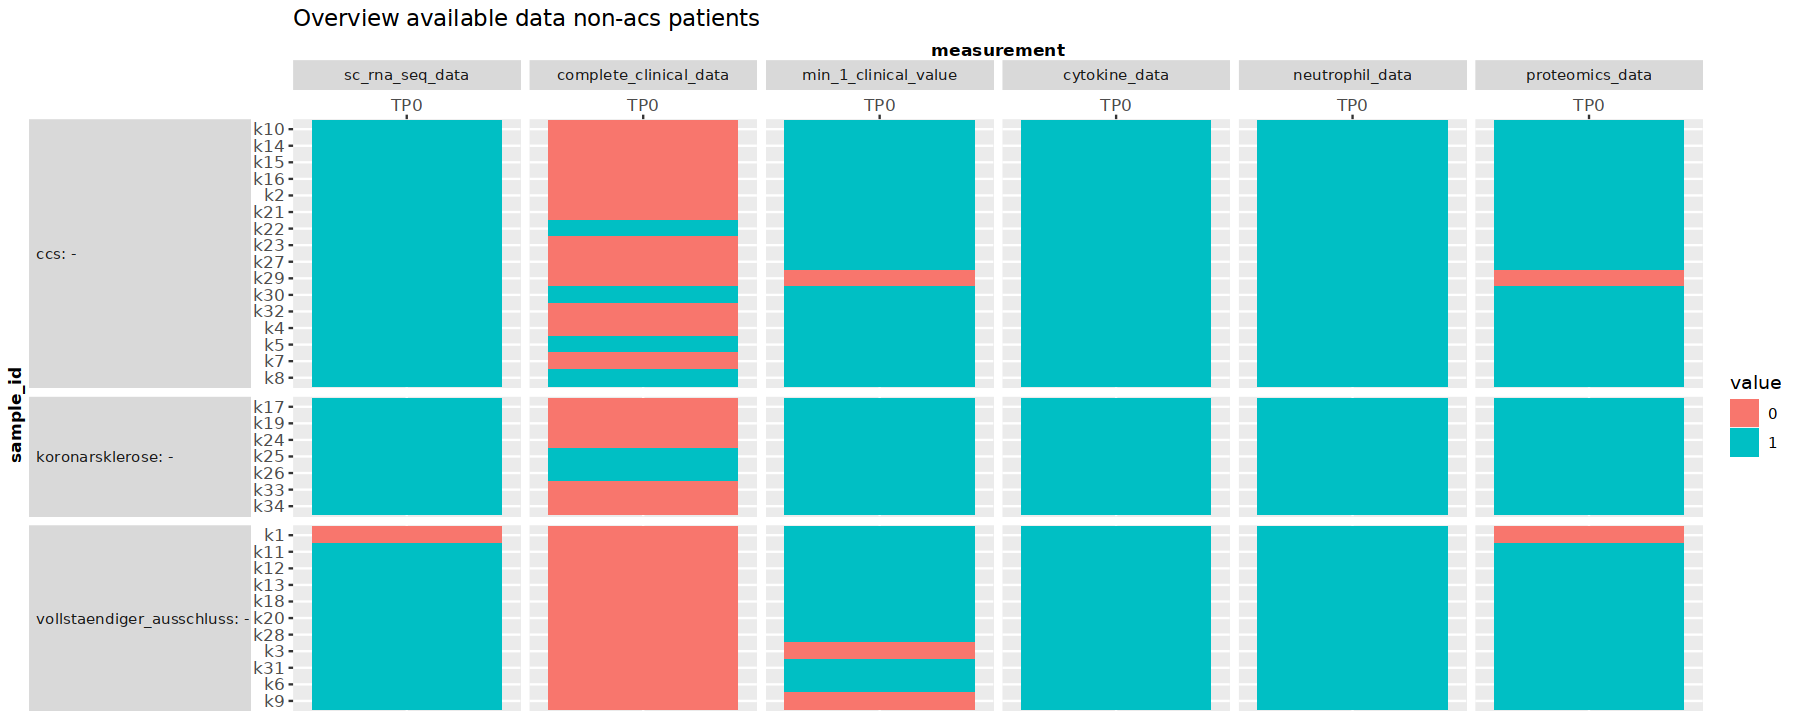

In [261]:
options(repr.plot.width=15, repr.plot.height=6)
g = ggplot(heatmap_overview[heatmap_overview$group %in% c('ccs', 'no_ccs'),], aes(measurement, sample_id, fill= value)) + geom_tile() + ggtitle(label = "Overview available data non-acs patients")+ theme(axis.text.x=element_text(size=10, angle =0), axis.text.y=element_text(size=10, angle = 0),axis.title=element_text(size=10,face="bold")) + facet_grid(plot_text ~ data_source  , scales = "free_y", space = "free_y",  switch = "y") +scale_x_discrete(position = "top") +  theme(strip.placement = "outside", strip.text.y.left = element_text(angle=0, hjust = 0)) 
g

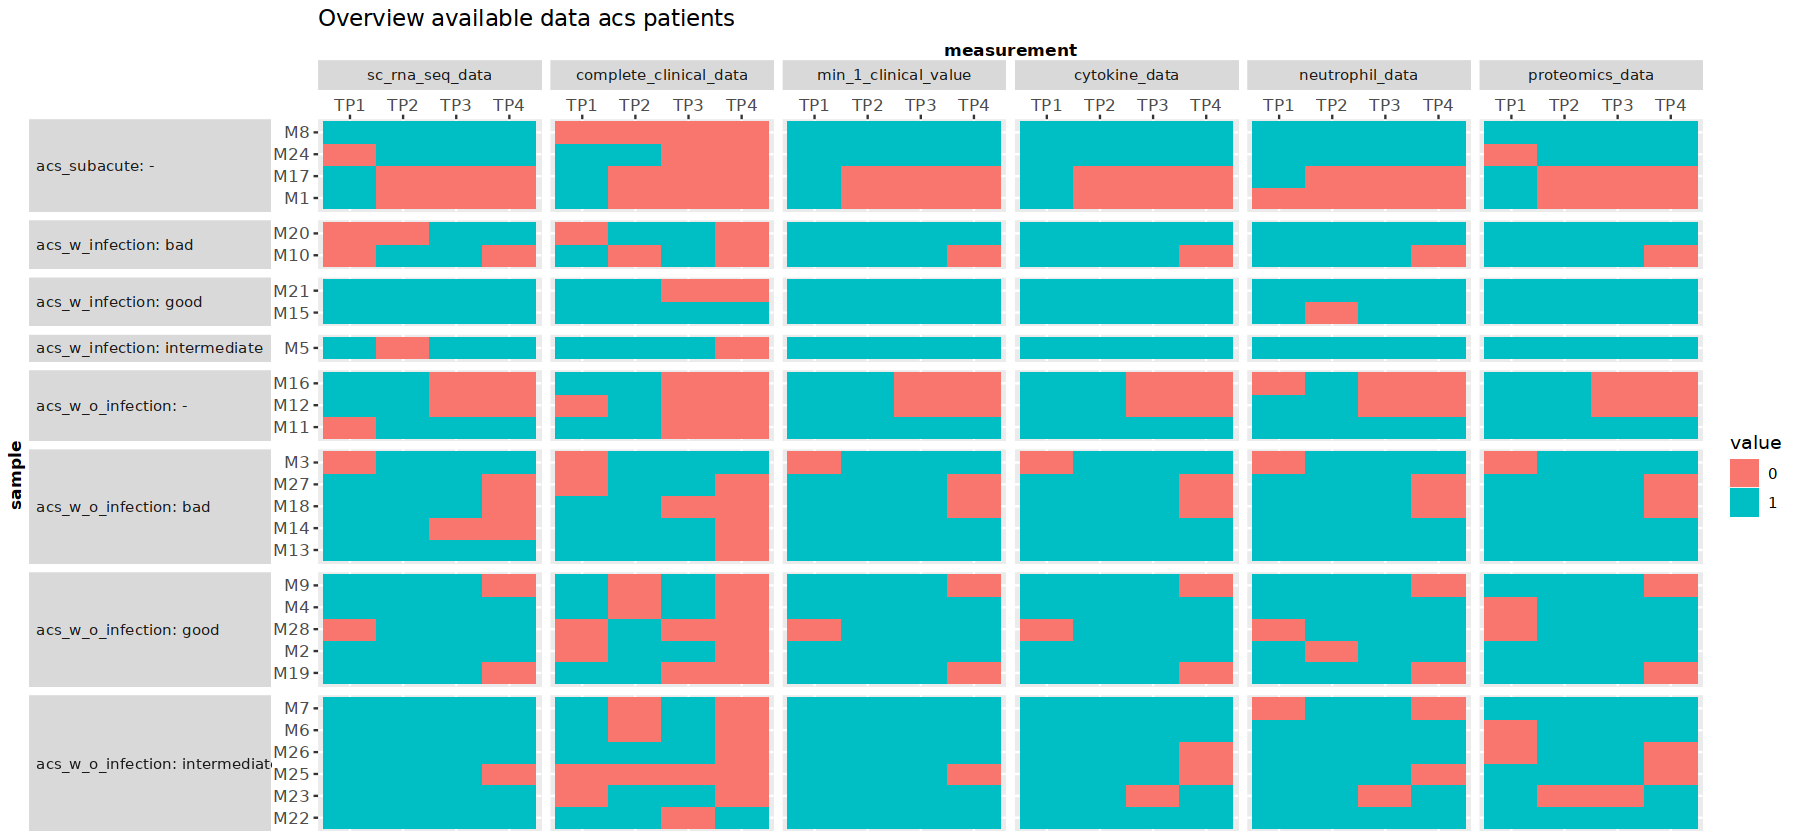

In [262]:
options(repr.plot.width=15, repr.plot.height=7)
g = ggplot(heatmap_overview[!heatmap_overview$group %in% c('ccs', 'no_ccs'),], aes(measurement, sample, fill= value)) + geom_tile() + ggtitle(label = "Overview available data acs patients")+ theme(axis.text.x=element_text(size=10, angle =0), axis.text.y=element_text(size=10, angle = 0),axis.title=element_text(size=10,face="bold")) + facet_grid(plot_text  ~ data_source  , scales = "free_y", space = "free_y",  switch = "y") +scale_x_discrete(position = "top")  + theme(strip.placement = "outside", strip.text.y.left = element_text(angle=0, hjust = 0))  
g

# Overview: Data to use for analysis

In [263]:
### Overview of available data and missing data per sample

In [265]:
nrow(all_samples_info)  # Overall: 145 sample - tp combinations

[1] 146

In [266]:
all_samples_info$complete_clinical_data = NULL
all_samples_info$min_1_clinical_value = NULL

In [267]:
write.csv(all_samples_info, paste0(result_path, '/00_Data_Overview/Available_Data_per_Sample_Overview.csv'))

In [268]:
### Merged Sample Data Meta-Data file

In [270]:
nrow(sample_data) # two samples measured twice --> 148 tp, library, sample combinations

[1] 149

In [271]:
sample_data$complete_clinical_data = NULL
sample_data$min_1_clinical_value = NULL

In [272]:
write.csv(sample_data, paste0(result_path, '/00_Data_Overview/Merged_Sample_Meta_Data.csv'))

In [273]:
### Prepared Cytokine Data

In [274]:
head(cytokines,2)

,sample_id,sCD40L,EGF,Eotaxin,FGF2,FLT3L,Fractalkine,GCSF,GMCSF,GROalpha,⋯,MCP4,MIP1.,SCF,SDF1alpha.beta,TARC,TPO,TRAIL,TSLP,id,cytokine_data
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,M1.1,1033.94,4.49,48.09,52.77,14.40,57.66,8.70,OOR <,3.43,⋯,91.13,2665.03,5.24,4033.41,59.34,354.84,44.25,4.65,m1.1,1
2,M11.1,232.19,16.74,32.19,54.38,52.98,107.78,OOR <,OOR <,8.20,⋯,73.06,5105.80,74.24,10498.23,10.47,OOR <,84.87,OOR <,m11.1,1


In [275]:
nrow(cytokines)  # 123 matchable ids

[1] 126

In [276]:
write.csv(cytokines, paste0(result_path, '/00_Data_Overview/Prepared_Cytokine_Data.csv'))

In [277]:
### Prepared neutrophil data

In [278]:
head(neutrophil_data,2)

,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,⋯,ENSG00000288612.1,ENSG00000288615.1,ENSG00000288617.1,ENSG00000288621.1,ENSG00000288631.1,ENSG00000288637.1,ENSG00000288638.1,ENSG00000288642.1,sample_id,neutrophil_data
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
k4_0_ccs_ccs,0,1,0,0,14,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,k4,1
m14_3_acs_acs_noinf,0,0,1,0,6,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,m14.3,1


In [279]:
# unique(unique_neutrophil_data_comp$value_type) # one row per data transformation type - OLD

In [280]:
## Info LS: Library Size normalized Read Counts

In [281]:
nrow(neutrophil_data)  # 121 matchable sample-ids

[1] 121

In [282]:
write.csv(neutrophil_data, paste0(result_path, '/00_Data_Overview/Prepared_Neutrophil_Data.csv'))

In [283]:
### Prepared proteomic data

In [284]:
head(proteomics,2)

,SERPINA1_A0A024R6I7,IGLV4.69_A0A075B6H9,IGLV8.61_A0A075B6I0,IGLV4.60_A0A075B6I1,IGLV10.54_A0A075B6I4,IGLV7.46_A0A075B6I9,IGLV2.18_A0A075B6J9,IGLV3.16_A0A075B6K0,IGLV3.12_A0A075B6K2,IGLV3.10_A0A075B6K4,⋯,MINPP1_Q9UNW1,TLN1_Q9Y490,ANGPTL3_Q9Y5C1,LYVE1_Q9Y5Y7,FCGBP_Q9Y6R7,COLEC10_Q9Y6Z7,IGHV3OR16.9_S4R460,APOA2_V9GYM3,sample_id,proteomics_data
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
M2.3_P10.2,-1.663380,-2.414588,1.467756,-6.164178,-1.858412,-2.588001,2.128858,-0.110549,1.968863,2.523862,⋯,4.3852723,-2.882139,-6.1443596,-4.26206,0.1977374,-1.653755,6.184887,4.235612,m2.3,1
M5.1_P1,3.744514,-2.672991,2.308556,-5.999634,-3.812528,-2.425649,1.186534,-2.204914,1.172303,1.799312,⋯,-0.5717449,-3.766868,0.4187132,-5.92088,-0.1863114,-1.655054,6.121172,4.837075,m5.1,1


In [285]:
nrow(proteomics) # 119 matchable sample-ids

[1] 119

In [286]:
write.csv(proteomics, paste0(result_path, '/00_Data_Overview/Prepared_Proteomic_Data.csv'))

# Save sample data for paper supplementary table

In [289]:
colnames(all_samples_info)

[1] "sample_id"              "sample"                 "id"                    
 [4] "measurement"            "sc_rna_seq_data"        "age"                   
 [7] "sex"                    "classification"         "group"                 
[10] "meta_data"              "ef_classification_data" "delta_ef_value_class"  
[13] "clinical_data"          "cytokine_data"          "neutrophil_data"       
[16] "proteomics_data"

In [290]:
colnames(sample_data)

[1] "sample_id"              "sample"                 "id"                    
 [4] "measurement"            "library"                "id.y"                  
 [7] "name"                   "read"                   "pattern"               
[10] "sequence"               "feature_type"           "X"                     
[13] "in_sample"              "measurement_tp"         "sc_rna_seq_data"       
[16] "age"                    "sex"                    "classification"        
[19] "group"                  "meta_data"              "delta_ef_value_group"  
[22] "delta_ef_value"         "delta_ef_value_class"   "ef_classification_data"
[25] "CK"                     "CK_MB"                  "Troponin"              
[28] "CRP"                    "clinical_data"

In [291]:
unique(sample_data$classification)

[1] "vollstaendiger_ausschluss" "ccs"                      
[3] "koronarsklerose"           "acs_subacute"             
[5] "acs_w_infection"           "acs_w_o_infection"

In [292]:
unique(sample_data$delta_ef_value_class)

[1] NA             "bad"          "good"         "intermediate"

In [293]:
share_sample_data = sample_data[,c('sample_id', 'sample', 'id', 'measurement', 'library', 'id.y','read', 'pattern', 'sequence','age', 'sex','classification', 'group', 'delta_ef_value_group', 'delta_ef_value', 'delta_ef_value_class', 'CK', 'CK_MB', 'Troponin', 'CRP')] 

In [294]:
supp_sample_data = sample_data[,c('sample_id', 'sample', 'id', 'measurement', 'library', 'id.y','read', 'pattern', 'sequence','age', 'sex','classification', 'group', 'delta_ef_value_group', 'delta_ef_value', 'delta_ef_value_class')] 

In [295]:
colnames(supp_sample_data) = c('sample_id', 'sample', 'id', 'measurement', 'library', 'hashtag', 'read', 'pattern', 'sequence', 'age', 'sex', 'classification', 'group', 'delta_ef_value_group', 'delta_ef_value', 'delta_ef_value_class') 

In [296]:
colnames(share_sample_data) = c('sample_id', 'sample', 'id', 'measurement', 'library', 'hashtag', 'read', 'pattern', 'sequence', 'age', 'sex', 'classification', 'group', 'delta_ef_value_group', 'delta_ef_value', 'delta_ef_value_class',  'CK', 'CK_MB', 'Troponin', 'CRP') 

In [300]:
nrow(supp_sample_data)

[1] 149

In [301]:
nrow(all_samples_info)

[1] 146

In [302]:
supp_sample_data_combined = merge(supp_sample_data, all_samples_info[, c('sample_id', 'sc_rna_seq_data', 'cytokine_data', 'neutrophil_data', 'proteomics_data')], all.x = TRUE, by = 'sample_id')
share_sample_data_combined = merge(share_sample_data, all_samples_info[, c('sample_id', 'sc_rna_seq_data', 'cytokine_data', 'neutrophil_data', 'proteomics_data')], all.x = TRUE, by = 'sample_id')

In [303]:
nrow(supp_sample_data_combined)

[1] 149

In [304]:
nrow(share_sample_data_combined)

[1] 149

In [307]:
colnames(share_sample_data_combined)

[1] "sample_id"            "sample"               "id"                  
 [4] "measurement"          "library"              "hashtag"             
 [7] "read"                 "pattern"              "sequence"            
[10] "age"                  "sex"                  "classification"      
[13] "group"                "delta_ef_value_group" "delta_ef_value"      
[16] "delta_ef_value_class" "CK"                   "CK_MB"               
[19] "Troponin"             "CRP"                  "sc_rna_seq_data"     
[22] "cytokine_data"        "neutrophil_data"      "proteomics_data"

In [329]:
unique(share_sample_data_combined[,c('sample', 'delta_ef_value_group', 'delta_ef_value')]) %>% group_by(  delta_ef_value_group) %>% summarise(
    amount = n(),
    min_delta_ef = min(delta_ef_value),
    max_delta_ef = max(delta_ef_value),
    mean_delta_ef = mean(delta_ef_value)
)

delta_ef_value_group,amount,min_delta_ef,max_delta_ef,mean_delta_ef
<chr>,<int>,<dbl>,<dbl>,<dbl>
x_greater_1,7,1.15,14.300,4.385714
x_smaller_0,7,-2.50,-0.060,-1.146714
x_smaller_1,7,0.00,0.875,0.395000
NA,41,NA,NA,NA


In [335]:
summary_data_group = unique(share_sample_data_combined[,c('sample', 'measurement', 'classification', 'CK', 'CK_MB', 'Troponin', 'CRP')]) %>% group_by(measurement,classification) %>% summarise(
    mean_CK = mean(as.numeric(CK), na.rm = TRUE),
    sd_CK = sd(as.numeric(CK), na.rm = TRUE),
    mean_CK_MB = mean(as.numeric(CK_MB), na.rm = TRUE),
    sd_CK_MB = sd(as.numeric(CK_MB), na.rm = TRUE),
    mean_Troponin = mean(as.numeric(Troponin), na.rm = TRUE),
    sd_Troponin = sd(as.numeric(Troponin), na.rm = TRUE),
    mean_CRP = mean(as.numeric(CRP), na.rm = TRUE),
    sd_CRP = sd(as.numeric(CRP), na.rm = TRUE),
    amount = n()
)
    

Warning message in mean(as.numeric(CK_MB), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in sd(as.numeric(CK_MB), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(CRP), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(CRP), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(CRP), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(CRP), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(CRP), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(CRP), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(CRP), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(CRP), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(CRP), na.rm = TRUE):
“NAs introduced by coercion”
Warning message in mean(as.numeric(CRP), na.rm = TRUE):
“NAs in

In [578]:
#supp_sample_data_combined[is.na(supp_sample_data_combined$proteomics_data),]

In [580]:
write.csv(supp_sample_data_combined, paste0(result_path, '/Supplementary/SUPP_00_Sample_Meta_Data_Overview.csv'))

In [294]:
write.csv(share_sample_data_combined, paste0(result_path, '/Data_Share/Sample_Data_Overview_and_Clinical_Data.csv'))